<a href="https://colab.research.google.com/github/IrmaGalijasevic/DataAnalysis/blob/main/ProjectTask1/VIS23_TIM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza Mobile Phone Price dataset-a

**Članovi grupe su zajedno radili na izradi zadataka.**

In [ ]:
!git clone https://github.com/Senka2112/VIS2023-datasets

fatal: destination path 'VIS2023-datasets' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import os
import re

dataset = pd.read_csv('VIS2023-datasets/MobilePhonePrice.csv', header=None, names=['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)', 'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'])
dataset['Price ($)'] = dataset['Price ($)'].replace("$", "", regex=True)


Set podataka dat za obradu vezan je za mobitele, njihove specifikacije i cijene.

Analiza dataseta se zasniva na grafičkim prikazima raspodjele instanci po svim kategorijama, kao i korelacijama između njih, na osnovu kojih su izvedeni odgovori na postavljena pitanja i hipoteze.
Najprije se analiziraju sama svojstva dataseta poput zastupljenosti svakog brenda, cjenovnih raspona, veličine ekrana po brendovima i sl. Potom se postavljaju hipoteze o korelacijama među njima.
Naposlijetku, uzimajući u obzir trenutno tržište, vrše se proračuni vjerovatnoće poput vjerovatnoće da će nasumično odabrani uređaj srednjeg cjenovnog ranga biti jedan od dva vodeća brenda Samsung ili Apple, s ciljem
odgovora na pitanje koji od njih je po ovom kriteriju pristupačniji za prosječnog korisnika.



Primjer dijela dataseta može se vidjeti ispod:


In [ ]:
dataset = dataset[1:]
dataset.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
1,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
2,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
3,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
4,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
5,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


U skupu podataka možemo vidjeti koliko je dato instanci i koliko varijabli:

In [ ]:
print(dataset.shape)

(407, 8)


##Analiza karakteristika dataseta


Prvo pitanje koje smo postavili s ciljem razumijevanja dataseta je:
>
### **Koji je brend najzastupljeniji?**
>
Iz sljedećeg grafa može se vidjeti da je Samsung najčešće pojavljuje zajedno sa Xiaomi i Oppo brendovima. Poznato je da oni imaju veliki broj različitih modela u svim cjenovnim rasponima. Sony je najmanje zastupljena kompanija što ima smisla ako se uzme u obzir da su se prestali fokusirati na proizvodnju mobitela i preusmjerili na druge uređaje poput fotoaparata.

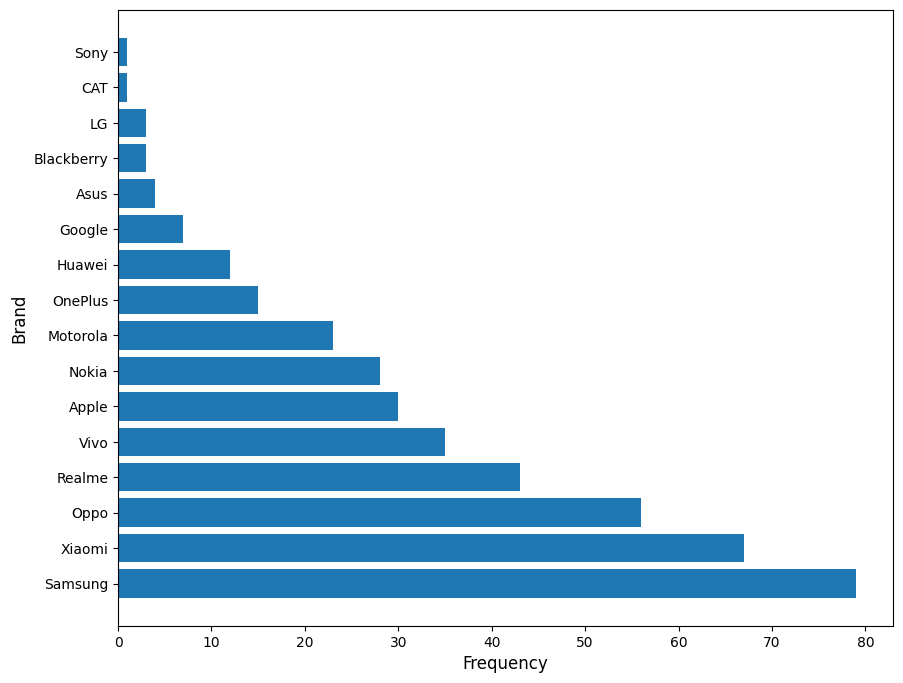

In [ ]:
plt.figure(figsize=(10,8))
most_frequent = dataset.groupby('Brand').size().sort_values(ascending=False)
ex = most_frequent.keys()
ey = most_frequent.values

plt.barh(y=ex,width=ey)
plt.xlabel('Frequency',fontsize=12)
plt.ylabel('Brand',fontsize=12);



---


Što se tiče raspodjele cijena po brendovima, najlakše ih je direktno usporediti korištenjem box plotova pomoću kojih možemo odgovoriti na nekoliko ključnih pitanja:

###  **Koji brend ima najskuplji model?**
  Samsung, iako općenito nema toliko skupe modele, ima jednog outlier-a
### **Koji brend ima najjeftiniji model?**
  Realme model od 99 dolara je najjeftiniji u dataset-u.
### **Koji brend ima najbolju raspodjelu cijena (moda u sredini između kvartila Q1 i Q3)?**
  Vivo ima najbolju raspodjelu, sa medijanom na 385 dolara.
### **Koji brend ima najuži raspon cijena?**
  Motorola ima modele čija se cijena pretežno nalazi u blizini 240 dolara.




<Axes: xlabel='Price ($)', ylabel='Brand'>

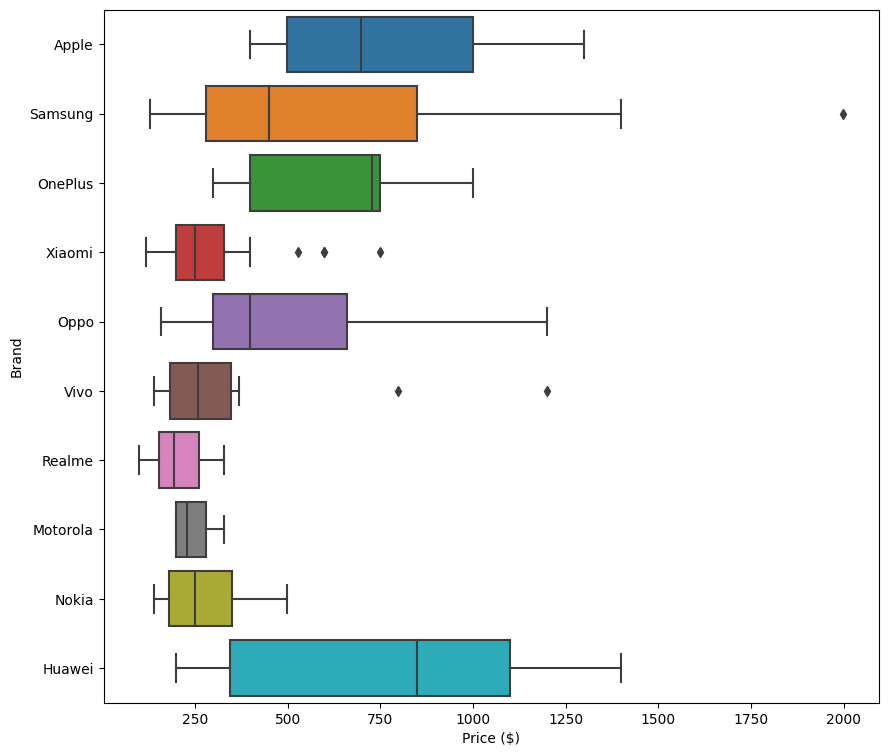

In [ ]:
#pretvaramo vrijednosti cijena u brojčani tip
dataset['Price ($)'] = pd.to_numeric(dataset['Price ($)'], errors='coerce')
dataset['Price ($)'] = dataset['Price ($)'].astype(float)

#sortiramo brendove po frekvenciji pojavljivaja
most_frequent = dataset.groupby('Brand').size().sort_values(ascending=False)
#biramo 10 najčešćih brendova i stavljamo ih u listu
top = most_frequent.head(10)
top = dataset.query(f'Brand == {top.keys().tolist()}')
#pravimo boxplot
plt.rcParams["figure.figsize"] = (10,9)
sns.boxplot(data=top,x='Price ($)',y='Brand')

In [ ]:
print('Najniza cijena svih modela je: ', top['Price ($)'].min())
print()
print('Izracunata medijana za modele iz boxplot-a: ')
top.groupby('Brand')['Price ($)'].mean()

Najniza cijena svih modela je:  99.0

Izracunata medijana za modele iz boxplot-a: 


Brand
Apple       743.827586
Huawei      783.166667
Motorola    240.111111
Nokia       285.666667
OnePlus     638.230769
Oppo        467.000000
Realme      208.166667
Samsung     611.775000
Vivo        385.000000
Xiaomi      287.125000
Name: Price ($), dtype: float64

---
Pošto većinu ljudi prvo zanima:
### **Koja je cijena "prosječnog" mobitela?**
uradili smo analizu svih modela u dataset-u da bismo mogli vidjeti koliko je novca prihvatljivo dati za mobitel danas (u dolarima).Vidimo da je varijansa dosta velika što znači da postoji velika razlika između jeftinijih i skupljih modela. Također je i medijan dosta manji od srednje vrijednosti pošto na nju ne utiču ekstremne vrijednosti.

In [ ]:
dataset['Price ($)'] = dataset['Price ($)'].astype(str)
dataset['Price ($)'] = dataset['Price ($)'].str.replace('[\$,]', '', regex=True).astype(float)
print('Srednja vrijednost:', dataset['Price ($)'].mean())
print('Standardna devijacija:', dataset['Price ($)'].std())
print('Medijan:', dataset['Price ($)'].median())
print('Varijansa:', dataset['Price ($)'].var())

Srednja vrijednost: 506.9746192893401
Standardna devijacija: 340.00624899041617
Medijan: 399.0
Varijansa: 115604.24935253288




---


Sljedeće što smo analizirali jeste raspon memorije uređaja, kao i raspodjelu u datasetu. Naredni plot nam daje odgovore na postavljena pitanja:

### **Koje su najpopularnije kombinacije (Storage - RAM) memorije?**
128GB - 6GB, 128GB - 8GB, 128GB - 4GB i 64GB - 4GB, dok su ostale znatno manje zastupljene.
### **Koje veličine se najrjeđe javljaju?**
Po pitanju Storage memorije to su 32 GB, 256 GB i 512 GB. Kod RAM memorije, 2 GB, 3 GB i 16 GB su daleko najmanje korištene.<br><br>

Ove informacije nam pružaju uvid u trenutni odnos potražnje i cijene na tržištu mobitela. Male količine memorije (poput 32GB-2GB, 32GB-3GB i sl.) postaju sve manje popularne jer su uglavnom nedovoljne za prosječnu upotrebu i već su prevaziđene. S druge strane, veće količine memorije (512GB-16GB, 256GB-16GB i sl.) su također rijetke zato što povlače veću cijenu uređaja, a većina korisnika nema potrebu za tako velikim kapacitetom skladištenja podataka.

<ipython-input-61-8f2bdd6be6e6>:43: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-61-8f2bdd6be6e6>:44: UserWarning:

FixedFormatter should only be used together with FixedLocator



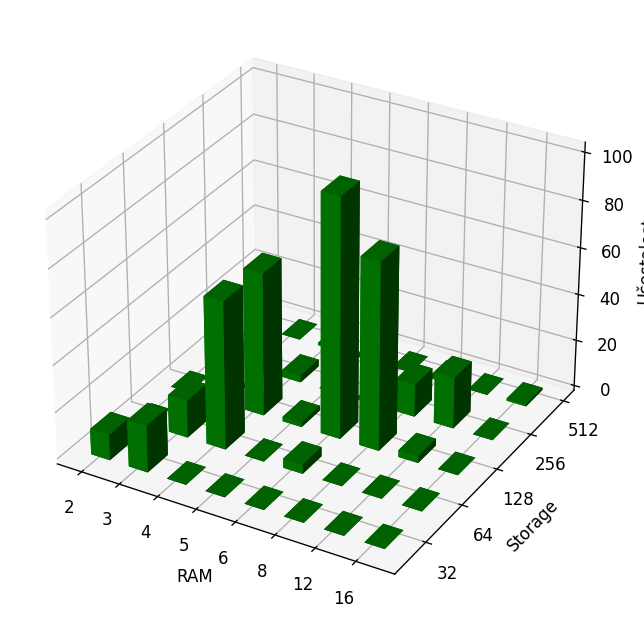

In [ ]:
x_values = [0, 2, 3, 4, 5, 6, 8, 12, 16]
y_values = [0, 32, 64, 128, 256, 512]

# pretvaramo sve elemente u kolonama dataseta 'Storage' i 'RAM' u brojcane vrijednosti, tj. izbacujemo svaku pojavu oznake GB
dataset['Storage'] = dataset['Storage'].str.lower().str.replace("gb", "")
dataset['Storage'] = pd.to_numeric(dataset['Storage'], errors='coerce')

dataset['RAM'] = dataset['RAM'].str.lower().str.replace("gb", "")
dataset['RAM'] = pd.to_numeric(dataset['RAM'], errors='coerce')

# kreiramo tabelu frekvencija po kolonama Storage i RAM u kojoj svaka celija govori koliko puta se uređeni par neke dvije vrijednosti iz ovih kolona ponovio u datasetu
result = pd.crosstab(index=dataset['Storage'], columns=dataset['RAM'])

# ovu tabelu pretvaramo u matricu
result_array = result.to_numpy()

# kreiramo dvije varijable koje sadrze broj kolona i redova kreirane matrice
num_cols = 8
num_row = 5

# kreiramo figuru ("platno" na kojem cemo praviti plot) velicine 6.5x6.5 incha
fig = plt.figure(figsize=(6.5, 6.5), dpi=120.0)

# unutar ovoga kreiramo 3D sistem na kojem cemo prikazati plot
ax = plt.axes(projection = "3d")

# kreiramo x i y ose, a zatim ih pretvaramo u 2D koordinatni sistem
xpos = np.arange(0, num_cols, 1)
ypos = np.arange(0, num_row, 1)
xpos, ypos = np.meshgrid(xpos + 0.9, ypos + 0.5)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(num_cols * num_row)

# specificiramo duzinu, sirinu i visinu stupaca
dx = np.ones(num_cols * num_row) * 0.5
dy = np.ones(num_cols * num_row) * 0.5
dz = result_array.flatten()

# prosljedjujemo sve parametre funkciji bar3d koja kreira 3D bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g')
ax.set_xticklabels(x_values)
ax.set_yticklabels(y_values)

ax.set_xlabel('RAM')
ax.set_ylabel('Storage')
ax.set_zlabel('Učestalost')

plt.show()


---
Na plotu ispod možemo vidjeti distribuciju veličine ekrana mobilnih telefona različitih brendova i modela. Svaki box predstavlja jedan brend mobilnog telefona, a horizontalna linija unutar boxa označava medijanu veličine ekrana za taj brend. Donji i gornji rub boxa predstavljaju granice prvog i trećeg kvartila, dok izvan tih granica možemo vidjeti pojedinačne podatke koji se mogu smatrati outlierima. Na ovaj način možemo uporediti distribuciju veličine ekrana za različite brendove i modela, te uočiti:
### **Postoje li neke značajne razlike u veličini ekrana između različitih brendova?**

Pošto nemamo dovoljno podataka za Sony, CAT i LG onda se ne može baš pravilno pokazati distribucija. Medijan kod Apple proizvoda je dosta veći nego kod ostalih brendova i ima mnogo više outliersa, dok je medijan kod Blackberry i Google mobitela najmanji. Možemo reći da nemaju ravnomjernu distribuciju što se tiče ovih podataka.

In [ ]:
dataset['Screen Size (inches)'] = pd.to_numeric(dataset['Screen Size (inches)'], errors='coerce')

brand_color_map = {'Apple': 'red', 'Samsung': 'blue', 'OnePlus': 'green','Xiaomi':'yellow','Google':'orange','Oppo':'purple','Vivo':'pink','Realme':'cyan','Motorola':'magenta','Nokia':'black','Sony':'pink','LG':'gray','ASUS':'olive','Blackberry':'red','CAT':'yellow','Huawei':'magenta'}

fig=px.box(dataset,x="Brand",y="Screen Size (inches)",points='all',color='Brand',title="Distribution of screen size for different brands and models.",color_discrete_sequence=px.colors.qualitative.Set2)
fig.show(height=1000)



---


Zanimalo nas je i:
### **Koji je prosjek kamere za svaki brend, tj. za svaki model brenda, te koje su vrijednosti najzastupljenije u svakom brendu?**
Zatim smo poredili kako se sve te vrijednosti odnose jedna prema drugoj kada ih poredimo međusobno.

Prvo se učita dataset o mobilnim telefonima, a zatim se definira funkcija "avg_camera_mp" koja iz stringa u koloni "Camera (MP)" izvlači sve brojeve (koristeći modul re) i računa prosjek. Tako se dobiva "Avg Camera (MP)" s prosječnim brojem megapiksela kamere za svaki mobilni telefon.

Histogram prikazuje broj mobilnih telefona koji padaju u svaku kategoriju u odnosu na raspon vrijednosti prosječnih megapiksela kamere. Histogram pokazuje da najviše ima mobitela čija prosječna kamera spada u rasponu od 10 do 20. Također vidimo da svi Apple modeli spadaju u istu kategoriju na x osi (prosječna kamera). Dok Samsung pruža veliki izbor različitih tipova kamera.

Boxplot nam pokazuje da se distribucije megapiksela kamere razlikuju između brendova. Na primjer, brend Apple ima ujednačeniju distribuciju u usporedbi s drugim brendovima, dok se za neke druge vidi veća varijabilnost u rasponu vrijednosti megapiksela kamere kao što su Samsung, Xiaomi, Motorola itd.

In [ ]:
data = pd.read_csv('VIS2023-datasets/MobilePhonePrice.csv', header=None, names=['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)','Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'])

#iz podataka uzimamo string kamera i sabiramo brojeve da bi dobili prosjek kamera za brendove
def avg_camera_mp(camera_str):
    camera_list = re.findall(r'\d+', camera_str)
    camera_list_int = [int(i) for i in camera_list]
    if len(camera_list_int) > 0:
        return sum(camera_list_int) / len(camera_list_int)
    else:
        return 0

data['Avg Camera (MP)'] = data['Camera (MP)'].apply(avg_camera_mp)
data = data.query("`Avg Camera (MP)` != 0 and `Price ($)` != 0")


fig = px.histogram(data, x='Avg Camera (MP)', nbins=20, color='Brand', title='Distribution of Camera Megapixel Count',color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(xaxis_title='Average Camera (MP)', yaxis_title='Count', legend_title='Brand')
plt.rcParams["figure.figsize"] = (10,10)
fig.show()

fig = px.box(data, x='Brand', y='Avg Camera (MP)', color='Brand', title='Distribution of Camera Megapixel Count by Brand',color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(xaxis_title='Brand', yaxis_title='Average Camera (MP)', legend_title='Brand')
plt.rcParams["figure.figsize"] = (10,10)
fig.show()

##Ispitivanje korelacije između varijabli

Nešto što ljude obično najčešće zanima kada su u potrazi za novim mobilnim uređajem jeste kapacitet njegove baterije i veličina ekrana. Mi smo se zapitali:
### **Da li se proizvođači mobilnih uređaja drže konvencije da veći ekrani normalno znače i veću potrošnju energije, odnosno da li veći ekran nužno znači i veća baterija?**
U scatter plotu ispod vidimo da Samsung ima par svojih modela koji se ističu od ostalih. Naime vidimo da dva modela Samsung mobilnih uređaja, su jedina dva koja imaju kapacitet baterije 7000mAh, dok također i za 4.5 inch-ni telefon su uspjeli staviti bateriju od 5000mAh.

Apple je poznat u posljednjim desetljećima da prave mobitele koji imaju zavidne performanse u pogledu procesorke snage, memorije, kamere i sl. međutim također su poznati i po tome da u sve svoje modele neovisno o tome kakve su im performanse stavljaju baterije malih kapaciteta. Ovo je potvrđeno grafom dolje gdje vidimo da na dnu dominira Apple pa je takođjer i najmanji kapacitet ove baze podataka pripao Apple-u sa 1821 mAh.

Ali ako pogledamo širu sliku vidimo da je većina proizvođača stacionirana u opsegu 4000-5000 mAh kapaciteta baterije i 6-7 inch-a dijagonale ekrana.


In [ ]:
data = pd.read_csv('VIS2023-datasets/MobilePhonePrice.csv', header=None, names=['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)', 'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'])
data = data[1:]
data['Price ($)'] = data['Price ($)'].str.replace("$", "").str.replace(",", ".").str.strip()
data['Price ($)'] = data['Price ($)'].astype(float)
data['Battery Capacity (mAh)'] = pd.to_numeric(data['Battery Capacity (mAh)'], errors='coerce')

data['Screen Size (inches)'] = data['Screen Size (inches)'].str.replace("\(unfolded\)", "").str.replace("\+ 3.9", "").str.strip()
data['Screen Size (inches)'] = data['Screen Size (inches)'].astype(float)

data_sorted = data.sort_values('Screen Size (inches)')
fig = px.scatter(data, x=data_sorted['Screen Size (inches)'], y='Battery Capacity (mAh)', size='Price ($)', color='Brand')

fig.update_layout(
    xaxis_title='Screen Size (inches)',
    xaxis=dict(
        tickmode='linear',
        dtick=0.1
    )
)
fig.show()

<ipython-input-64-4291dea2d3ef>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-64-4291dea2d3ef>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



---
Kako se može primijetiti porast veličine ekrana sa kapacitetom baterije odlučili smo ispitati korelaciju između ove dvije varijable. Iz dobijenih brojčanih vrijednosti možemo zaključiti da postoji određeni stepen povezanosti u ovim podacima, s tim da bi bilo potrebno dodatno ispitivanje da bi se stvarna korelacija mogla zaključiti.



In [ ]:
from numpy import cov
data['Screen Size (inches)'] = pd.to_numeric(data['Screen Size (inches)'], errors='coerce')
# Calculate covariance between battery capacity and screen size
covariance = data[['Battery Capacity (mAh)', 'Screen Size (inches)']].cov()
print('Kovarijansa izmedju kapaciteta baterije i velicine ekrana: ')
print()
print(covariance)
print()
# Calculate correlation between battery capacity and screen size
correlation = data['Battery Capacity (mAh)'].corr(data['Screen Size (inches)'])
print('Korelacija izmedju kapaciteta baterije i velicine ekrana: ', correlation)

Kovarijansa izmedju kapaciteta baterije i velicine ekrana: 

                        Battery Capacity (mAh)  Screen Size (inches)
Battery Capacity (mAh)           635517.816572            155.854869
Screen Size (inches)                155.854869              0.102747

Korelacija izmedju kapaciteta baterije i velicine ekrana:  0.6099173719676235




---


Još jedan faktor koji je veoma bitan pri odabiru mobitela i koji utiče na njegovu cijenu jeste RAM, pa smo se zapitali:
###**Kako RAM utiče na cijenu mobitela?**
Što više RAM-a imate na mobitelu, to ćete moći otvoriti više aplikacija i raditi više stvari istovremeno bez usporavanja ili problema s performansama. Zbog toga smo odabrali da tu vezu predstavimo scatter plotom.

Ovaj plot pokazuje da postoji pozitivna korelacija između RAM-a i cijene, budući da su telefoni s većim RAM-om obično skuplji. Osim toga veličina tačaka predstavlja i veličinu memorije (GB). Na taj način vidimo da ja ona u uskoj vezi s RAM-om, a samim tim i sa cijenom.

Zanimljivo je primijetiti da ne utiče samo RAM na cijenu već i sami brend mobitela (koji je predstavljen različitim bojama). Npr vidimo sa plota da Apple sa RAM-om od 4GB ima dosta veću cijenu za razliku od Samsunga ili nekih drugih brendova koji za relativno istu cijenu daju mnogo više RAM-a. Samsung i LG imaju modele koji se ističu od ostalih u RAM-u i cijeni.

RAM u mobitelima varira ovisno o modelu, marci i godini proizvodnje. Mnogi drugi faktori, kao što su procesor, softver i druge komponente, mogu također uticati na kvalitetu i performanse RAM-a.

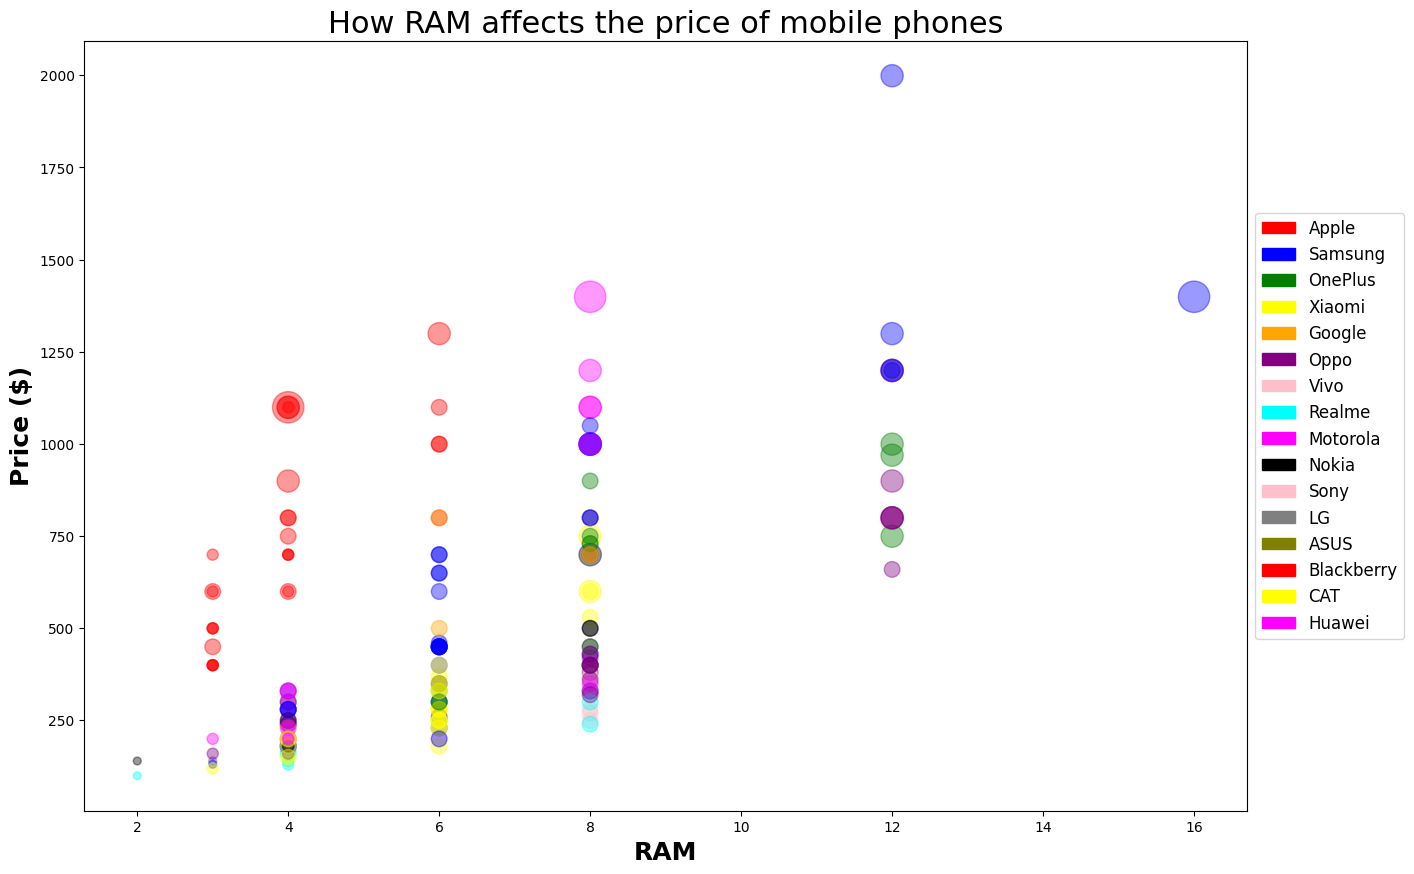

In [ ]:
%matplotlib inline
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d

dataset['RAM'] = pd.to_numeric(dataset['RAM'], errors='coerce')
dataset['Price ($)'] = pd.to_numeric(dataset['Price ($)'], errors='coerce')
dataset['Storage'] = pd.to_numeric(dataset['Storage'], errors='coerce')

brand_color_map = {'Apple': 'red', 'Samsung': 'blue', 'OnePlus': 'green','Xiaomi':'yellow','Google':'orange','Oppo':'purple','Vivo':'pink','Realme':'cyan','Motorola':'magenta','Nokia':'black','Sony':'pink','LG':'gray','ASUS':'olive','Blackberry':'red','CAT':'yellow','Huawei':'magenta'}
colors = dataset['Brand'].apply(lambda x: brand_color_map.get(x, 'gray'))

patches = [mpatches.Patch(color=color, label=brand) for brand, color in brand_color_map.items()]
plt.figure(figsize=(15,10))

plt.title('How RAM affects the price of mobile phones',fontsize=22)
plt.scatter(dataset['RAM'], dataset['Price ($)'], alpha=0.4, c=colors ,s=dataset['Storage'])
plt.xlabel('RAM', fontsize=18, fontweight='bold')
plt.ylabel('Price ($)', fontsize=18, fontweight='bold')

plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True,fontsize=12)
plt.show()

Odnos ove dvije varijable smo odlučili prikazati još jednim plotom koji predstavlja zajedničku distribuciju s ciljem potvrde hipoteze da je njihova veza linearne prirode.
S grafika vidimo da zaista povećanjem jedne varijable i druga raste, te možemo reći da ima pozitivne korelacije među njima. Naravno,
ovo nije dovoljno za tvrđenje da je rast jedne varijable posljedica rasta druge, budući da su za to neophodna dodatna statistička ispitivanja, naprosto nam govori da se varijable slično ponašaju.

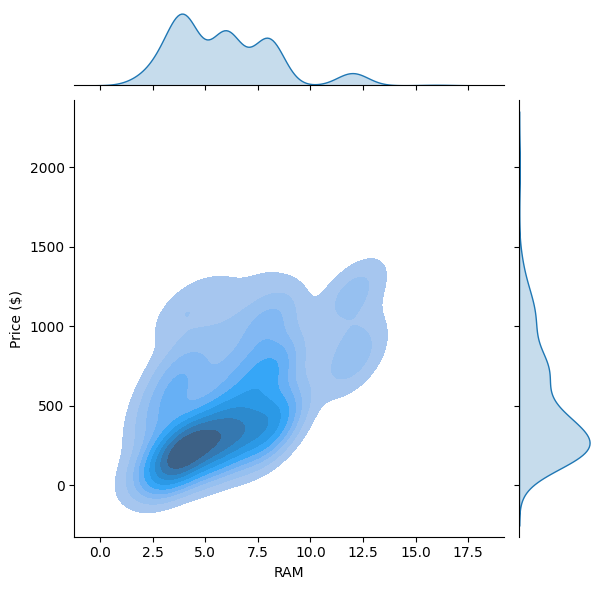

In [ ]:
dataset['RAM'] = pd.to_numeric(dataset['RAM'], errors='coerce')
dataset['Price ($)'] = pd.to_numeric(dataset['Price ($)'], errors='coerce')

sns.jointplot(data=dataset, x=dataset['RAM'], y=dataset['Price ($)'], kind="kde", fill=True)

##Proračun vjerovatnoće

Uzimajući u obzir da je kapacitet baterije od 3000 mAh (i veći) dovoljan za prosječnu dnevnu upotrebu, zanimalo nas je u kolikoj mjeri instance iz našeg dataseta zadovoljavaju ovo svojstvo. Uzimajući tri nasumična uređaja iz dataseta, izvršili smo proračun vjerojatnoće da će neki od njih ili sva tri imati kapacitet baterije veći od ove.

In [ ]:
# Broj mobilnih telefona s kapacitetom baterije većim od 3000 mAh
dataset['Battery Capacity (mAh)'] = pd.to_numeric(dataset['Battery Capacity (mAh)'], errors='coerce')
count = len(dataset[dataset["Battery Capacity (mAh)"] > 3000])

# Ukupan broj mobilnih telefona
total_count = len(data)

probability1 = count / total_count

probability2 = (count - 1) / (total_count - 1)

probability3 = (count - 2) / (total_count - 2)

probability = probability1 * probability2 * probability3

print("Vjerovatnoća da prvi mobitel ima kapacitet baterije veći od 3000 mAh: ")
print(probability1)
print("\nVjerojatnoća da drugi mobitel ima kapacitet baterije veći od 3000 mAh: ")
print(probability2)
print("\nVjerojatnoća da treći mobitel ima kapacitet baterije veći od 3000 mAh: ")
print(probability3)
print("\nVjerojatnoća da sva tri mobitela imaju kapacitet baterije veći od 3000 mAh: ")
print(probability)

Vjerovatnoća da prvi mobitel ima kapacitet baterije veći od 3000 mAh: 
0.9484029484029484

Vjerojatnoća da drugi mobitel ima kapacitet baterije veći od 3000 mAh: 
0.9482758620689655

Vjerojatnoća da treći mobitel ima kapacitet baterije veći od 3000 mAh: 
0.9481481481481482

Vjerojatnoća da sva tri mobitela imaju kapacitet baterije veći od 3000 mAh: 
0.8527147837492666




---


Pošto se godinama vodi bitka na tržištu mobilnih telefona između Samsunga i Apple-a i vodeći brend se skoro svake godine smjenjuje, odlučili smo provjeriti koliko su oba brenda dostupna po pitanju cijene i kvalitete "običnom narodu". Naime, provjerit ćemo kolika je vjerovatnoća da je izabrani mobilni telefon, u srednjem cjenovnom rangu, jedan od vodećih brendova tj. Samsung ili Apple.


Prvo definišimo nas "srednji cjenovni rang". Pošto je srednji cjenovni rang relativan pojam, napravit ćemo box-plot svih cijena naše baze podataka te ćemo granice našeg cjenovnog ranga definisati uz pomoć kvartila, jer se između njih nalazi 50% vrijednosti varijable "cijena".

In [ ]:
dataset['Price ($)'] = dataset['Price ($)'].astype(str)
dataset['Price ($)'] = dataset['Price ($)'].str.replace('[\$,]', '', regex=True).astype(float)

fig = px.box(dataset, x='Price ($)')

fig.show()




---




Sada kada smo odredili naš cjenovni rang (239-699)[$], odredit ćemo neke osnovne informacije o ova dva brenda čisto da se uvjerimo da modeli ova dva brenda postoje u bazi podataka, kolika je vjerovatnoća ova dva brenda u odnosu na sve brendove i kolike su vjerovatnoće Samsunga i Apple-a da se nađu u našem cjenovnom rangu.

In [ ]:
total_phones = len(dataset)
samsung_phones = len(dataset[dataset['Brand'] == 'Samsung'])
p_samsung = samsung_phones / total_phones

print(f"Ukupan broj svih telefona: {total_phones}")
print(f"Samsung telefoni: {samsung_phones}")
print(f"Vjerovatnoca telefona da je Samsung: {p_samsung*100:.2f}%")


Ukupan broj svih telefona: 407
Samsung telefoni: 79
Vjerovatnoca telefona da je Samsung: 19.41%


In [ ]:
apple_phones = len(dataset[dataset['Brand'] == 'Apple'])
p_apple = apple_phones / total_phones

print(f"Apple telefoni: {apple_phones}")
print(f"Vjerovatnoca telefona da je Apple: {p_apple*100:.2f}%")


Apple telefoni: 30
Vjerovatnoca telefona da je Apple: 7.37%


In [ ]:
samsung_midrange_phones = len(dataset[(dataset['Brand'] == 'Samsung') & (dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699)])
p_samsung_midrange = samsung_midrange_phones / samsung_phones

print(f"Samsung telefoni u srednjem cjenovnom rangu: {samsung_midrange_phones}")
print(f"Vjerovatnoca da je Samsung telefon u srednjem cjenovnom rangu: {p_samsung_midrange*100:.2f}%")


Samsung telefoni u srednjem cjenovnom rangu: 20
Vjerovatnoca da je Samsung telefon u srednjem cjenovnom rangu: 25.32%


In [ ]:
apple_midrange_phones = len(dataset[(dataset['Brand'] == 'Apple') & (dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699)])
p_apple_midrange = apple_midrange_phones / apple_phones

print(f"Apple telefoni u srednjem cjenovnom rangu: {apple_midrange_phones}")
print(f"Vjerovatnoca da je Apple telefon u srednjem cjenovnom rangu: {p_apple_midrange*100:.2f}%")


Apple telefoni u srednjem cjenovnom rangu: 16
Vjerovatnoca da je Apple telefon u srednjem cjenovnom rangu: 53.33%


Vjerovatnoća da je telefon iz srednjeg cjenovnog ranga brend Samsung:

In [ ]:
P_Samsung = dataset[dataset['Brand'] == 'Samsung'].shape[0] / dataset.shape[0]

P_mid_range = dataset[(dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699)].shape[0] / dataset.shape[0]

P_mid_range_given_Samsung = dataset[(dataset['Brand'] == 'Samsung') & (dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699)].shape[0] / dataset[dataset['Brand'] == 'Samsung'].shape[0]

P_Samsung_given_mid_range = (P_mid_range_given_Samsung * P_Samsung) / P_mid_range

print("Vjerovatnoca da je izabrani telefon iz srednjeg cjenovnog ranga Samsung: {:.2f}%".format(P_Samsung_given_mid_range * 100))


Vjerovatnoca da je izabrani telefon iz srednjeg cjenovnog ranga Samsung: 19.80%




---
Vjerovatnoća da je telefon iz srednjeg cjenovnog ranga brend Apple:


In [ ]:
p_mid_given_apple = len(dataset[(dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699) & (dataset['Brand'] == 'Apple')]) / len(dataset[dataset['Brand'] == 'Apple'])

p_apple = len(dataset[dataset['Brand'] == 'Apple']) / len(dataset)

p_mid = len(dataset[(dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699)]) / len(dataset)

p_apple_given_mid = p_mid_given_apple * p_apple / p_mid

print(f"Vjerovatnoca da je izabrani telefon iz srednjeg cjenovnog ranga Apple: {p_apple_given_mid*100:.2f}%")


Vjerovatnoca da je izabrani telefon iz srednjeg cjenovnog ranga Apple: 15.84%




---
Vjerovatnoća da telefon iz srednjeg cjenovnog ranga nije ni Apple ni Samsung:

In [ ]:

total_phones = len(dataset)

P_Samsung = len(dataset[dataset['Brand'] == 'Samsung']) / total_phones

P_Apple = len(dataset[dataset['Brand'] == 'Apple']) / total_phones

P_midrange_not_AS = len(dataset[(dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699) & (dataset['Brand'] != 'Apple') & (dataset['Brand'] != 'Samsung')]) / len(dataset[(dataset['Brand'] != 'Apple') & (dataset['Brand'] != 'Samsung')])

P_midrange_Samsung = len(dataset[(dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699) & (dataset['Brand'] == 'Samsung')]) / len(dataset[dataset['Brand'] == 'Samsung'])

P_midrange_Apple = len(dataset[(dataset['Price ($)'] >=239) & (dataset['Price ($)'] <= 699) & (dataset['Brand'] == 'Apple')]) / len(dataset[dataset['Brand'] == 'Apple'])

P_not_AS = len(dataset[(dataset['Brand'] != 'Apple') & (dataset['Brand'] != 'Samsung')]) / total_phones

P_midrange = len(dataset[(dataset['Price ($)'] >= 239) & (dataset['Price ($)'] <= 699)]) / total_phones

P_not_AS_midrange = P_midrange_not_AS * P_not_AS / P_midrange
print(f"Vjerovatnoca da je izabrani telefon iz srednjeg cjenovnog ranga nije ni Apple ni Samsung: {P_not_AS_midrange*100:.2f}%")


Vjerovatnoca da je izabrani telefon iz srednjeg cjenovnog ranga nije ni Apple ni Samsung: 64.36%




---


Ipak vidimo i da je dosta veliki procenat vjerovatnoće da telefon nije ni Apple ni Samsung, što ima kao posljedicu to da ni Samsung nije baš popularan u odabranom cjenovnom rangu. Ovo može značiti dvije stvari, prva jeste da se i drugi brendovi takmiče sa svojim proizvodima u ovom opsegu cijene, jer se on izgleda čini najpopularnijim, a druga mogućnost je da godine "iskustva" ova dva brenda na tržištu su dovela do toga da se više fokusiraju na "premium" telefone koji su već i kako i samo ime kaže u "premium" opsegu cijena.


Kao provjeru mozemo izvršiti sabiranje prethodnih vjerovatnoća i kao rezultat bismo trebali dobiti 1.

In [ ]:
print(f"Zbir pojedinih vjerovatnoca da je telefon Samsung: {P_Samsung_given_mid_range*100:.2f}%, da je telefon Apple: {p_apple_given_mid*100:.2f}% i da telefon nije ni Samsung ni Apple: {P_not_AS_midrange*100:.2f}% bi trebao biti: {round(P_Samsung_given_mid_range+p_apple_given_mid+P_not_AS_midrange)}")


###**Koji brendovi mobilnih telefona su najviše povezani s visokom cijenom?**

Da bismo to provjerili odabrali smo da je visoka cijena preko $500 i gledali koja je vjerovatnoća da je neki skupi telefon iz odgovarajućeg brenda. Možemo zaključiti da brendovi sa najskupljim mobilnim telefonima su Apple, Samsung i Huawei.

In [ ]:
import pandas as pd

data = pd.read_csv('VIS2023-datasets/MobilePhonePrice.csv', header=None, names=['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)','Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'])
data['Price ($)'] = pd.to_numeric(data['Price ($)'], errors='coerce')
high_price=data[data['Price ($)'] >= 500]

features = ['Brand']
counts = {}
for feature in features:
    counts[feature] = {}

# Brojanje brendova telefona čija je cijena >=500
for feature in features:
    for value in set(high_price[feature]):
        counts[feature][value] = len(high_price[high_price[feature] == value])

# Vjerovatnoća za svaki brend
total_high_price = len(high_price)
for feature in features:
    for value in counts[feature]:
        counts[feature][value] /= total_high_price

print("Vjerovatnoća da je skupi telefon iz sljedećih brendova: ")
for feature in counts:
    for value, prob in counts[feature].items():
        print(f"- {value}: {prob:.2f}")

Vjerovatnoća da je skupi telefon iz sljedećih brendova: 
- Oppo: 0.10
- Huawei: 0.11
- OnePlus: 0.11
- Vivo: 0.03
- Google: 0.07
- Xiaomi: 0.06
- Samsung: 0.24
- Apple: 0.29
